In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
file_path = '/content/TCGA_GBM_LGG_Mutations_all.csv'
df = pd.read_csv(file_path)

In [16]:
# Columns to be encoded
columns_to_encode = ['Grade', 'Project', 'Case_ID', 'Gender',
       'Primary_Diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR',
       'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']


In [17]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a DataFrame to store encoded data
encoded_df = pd.DataFrame()

# Encode categorical columns and store them in encoded_df
for col in columns_to_encode:
    encoded_df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Handle 'Age_at_diagnosis' separately
df['Age_at_diagnosis'].fillna('-1 years', inplace=True)
df['Age_at_diagnosis'] = df['Age_at_diagnosis'].astype(str).str.extract(r'(\d+)').fillna(-1).astype(int)
# Add the processed 'Age_at_diagnosis' to encoded_df
encoded_df['Age_at_diagnosis'] = df['Age_at_diagnosis']

# Drop rows with NaN or missing values in encoded_df
encoded_df.dropna(inplace=True)

# Display the DataFrame with the extracted age values
print("DataFrame with Extracted Age Values:")
print(encoded_df)

DataFrame with Extracted Age Values:
     Grade_encoded  Project_encoded  Case_ID_encoded  Gender_encoded  \
0                1                1              480               2   
1                1                1              732               2   
2                1                1              692               2   
3                1                1              518               1   
4                1                1              775               2   
..             ...              ...              ...             ...   
857              0                0              233               1   
858              0                0              196               2   
859              0                0              266               1   
860              0                0              300               2   
861              0                0               79               2   

     Primary_Diagnosis_encoded  Race_encoded  IDH1_encoded  TP53_encoded  \
0                     

In [18]:
print(encoded_df.columns)

Index(['Grade_encoded', 'Project_encoded', 'Case_ID_encoded', 'Gender_encoded',
       'Primary_Diagnosis_encoded', 'Race_encoded', 'IDH1_encoded',
       'TP53_encoded', 'ATRX_encoded', 'PTEN_encoded', 'EGFR_encoded',
       'CIC_encoded', 'MUC16_encoded', 'PIK3CA_encoded', 'NF1_encoded',
       'PIK3R1_encoded', 'FUBP1_encoded', 'RB1_encoded', 'NOTCH1_encoded',
       'BCOR_encoded', 'CSMD3_encoded', 'SMARCA4_encoded', 'GRIN2A_encoded',
       'IDH2_encoded', 'FAT4_encoded', 'PDGFRA_encoded', 'Age_at_diagnosis'],
      dtype='object')


In [19]:
# List class names for Gender
gender_classes = label_encoder.fit(df['Gender']).classes_
print("Class names for Gender:", gender_classes)

# Drop rows where Gender is '--' in encoded_df
gender_encoded_class_index = list(gender_classes).index('--')
encoded_df = encoded_df[encoded_df['Gender_encoded'] != gender_encoded_class_index]

# List class names for Gender
gender_classes = label_encoder.fit(encoded_df['Gender_encoded']).classes_
print("Class names for Gender:", gender_classes)

Class names for Gender: ['--' 'Female' 'Male']
Class names for Gender: [1 2]


In [20]:
# Features (all columns except 'Grade_encoded')
features = encoded_df.drop(columns=['Grade_encoded'])

# Label ('Grade_encoded')
label = encoded_df['Grade_encoded']

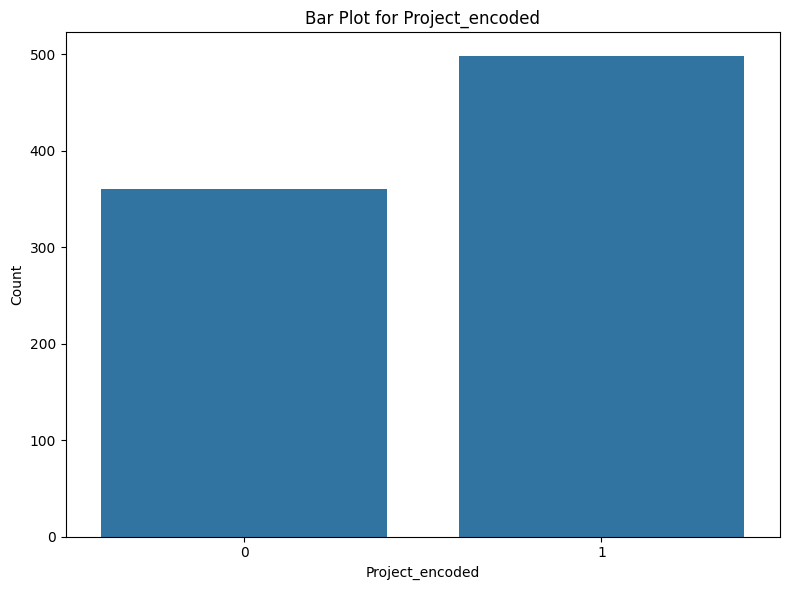

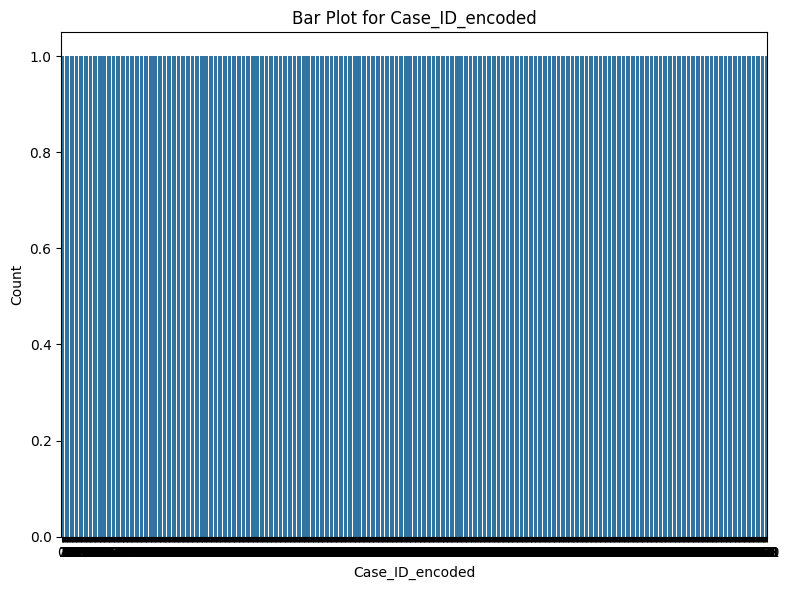

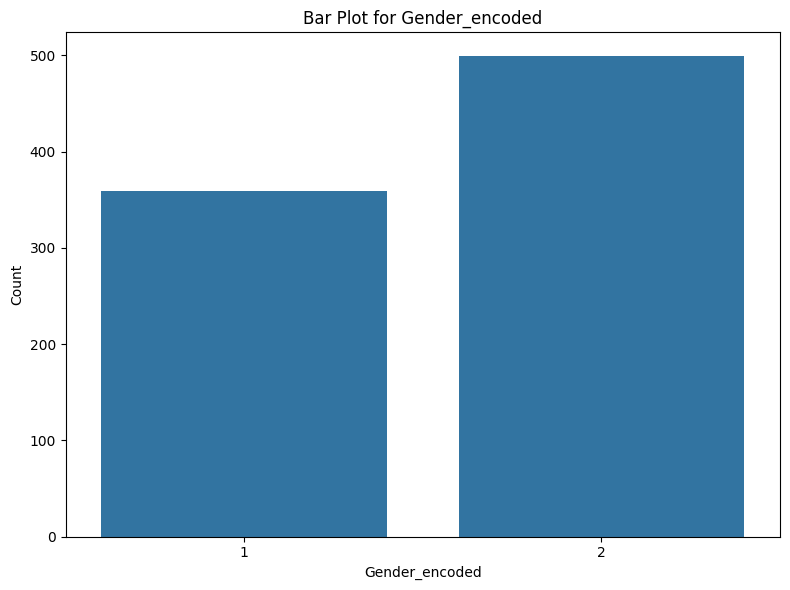

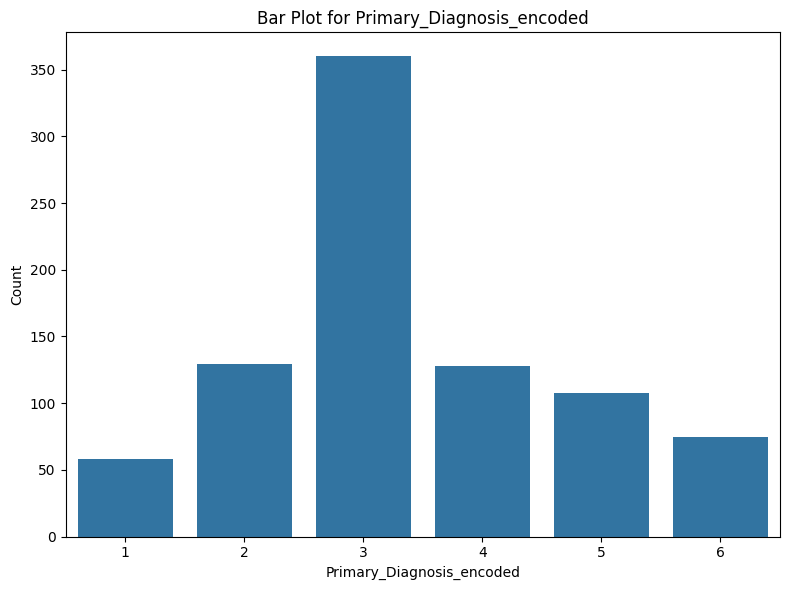

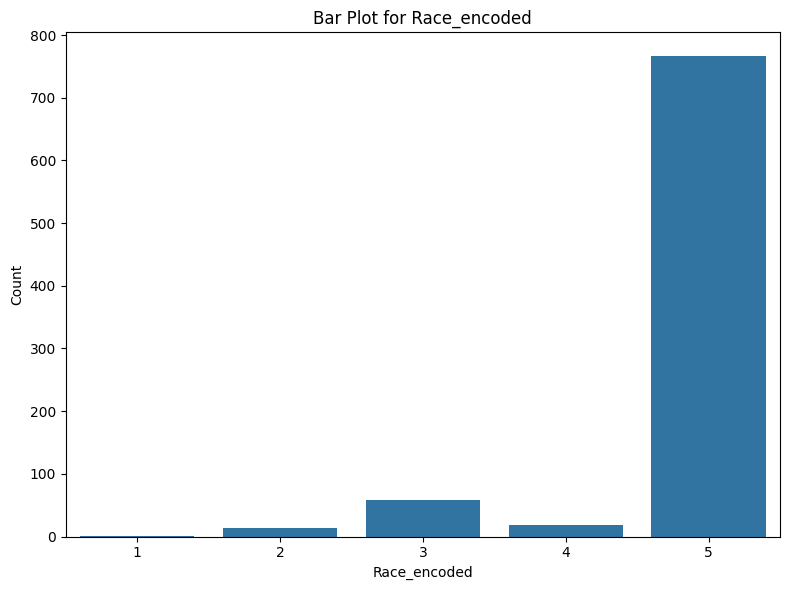

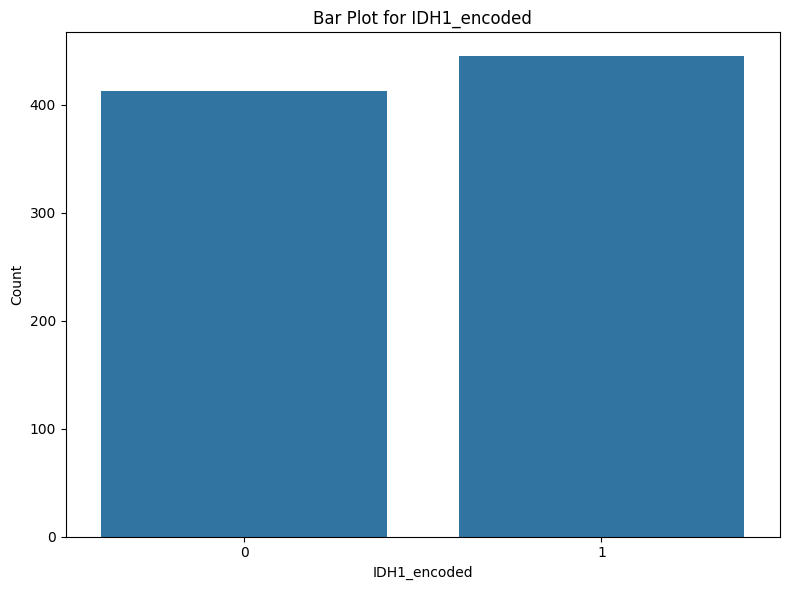

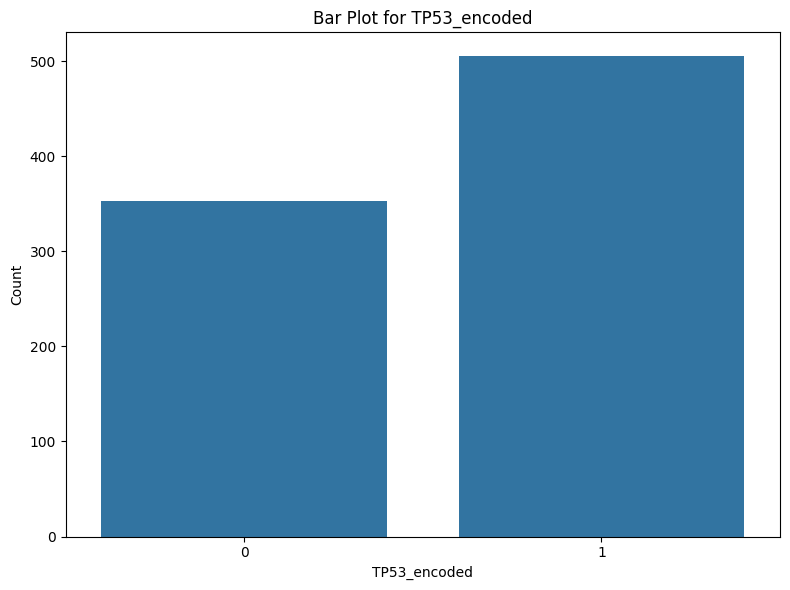

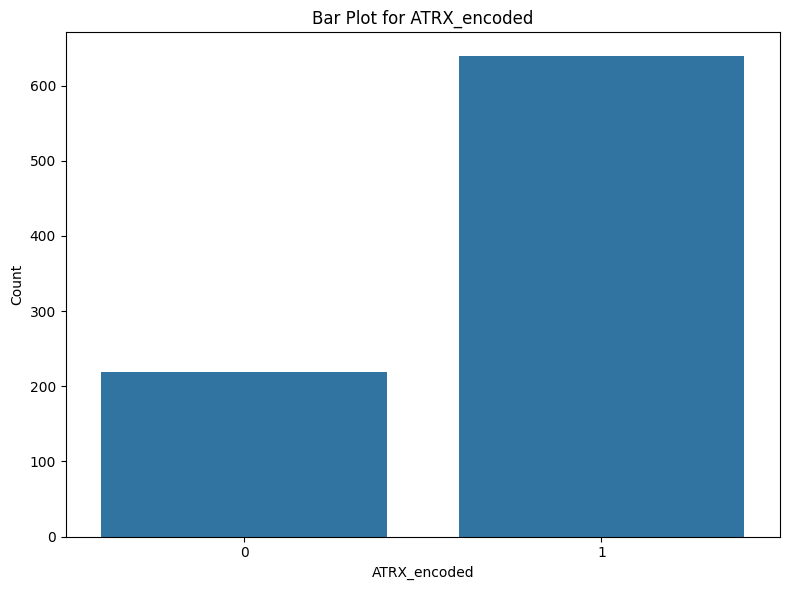

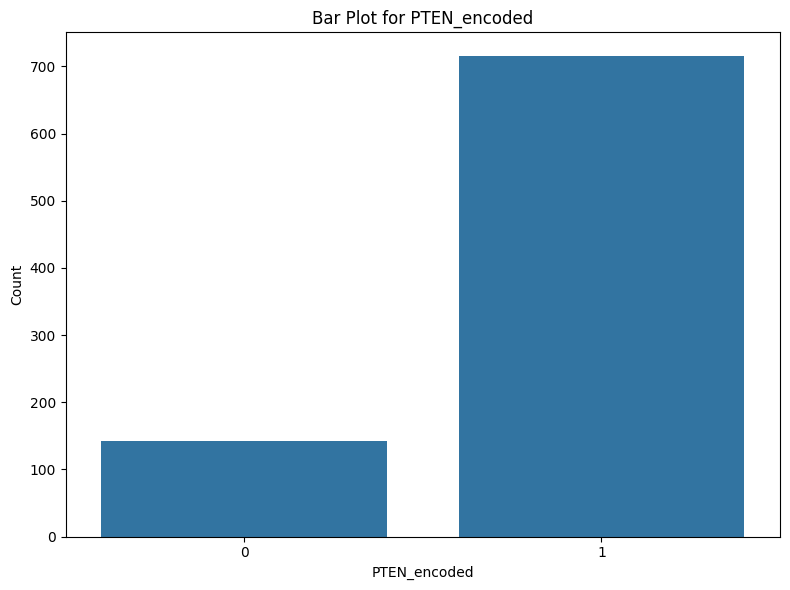

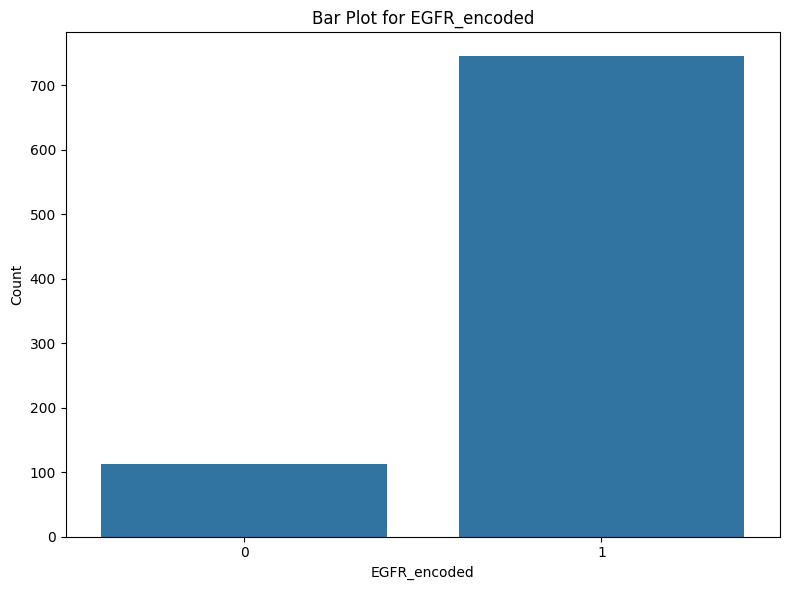

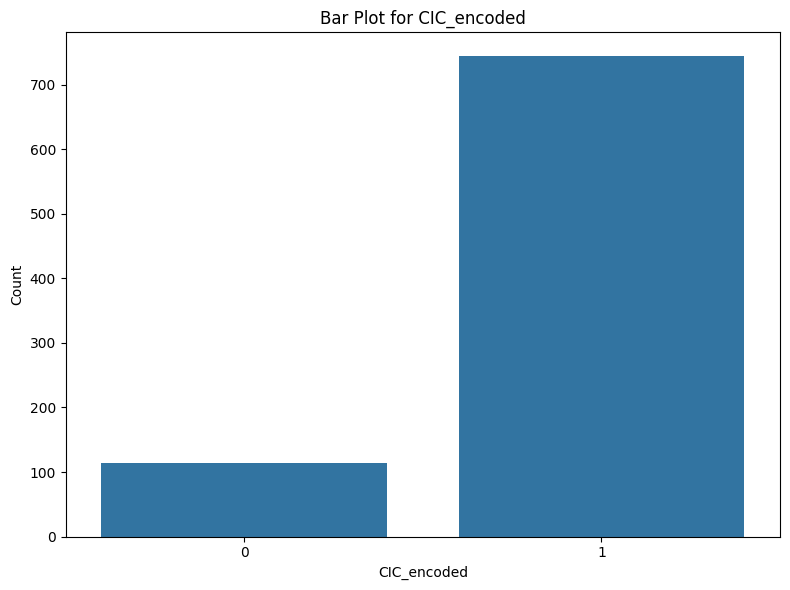

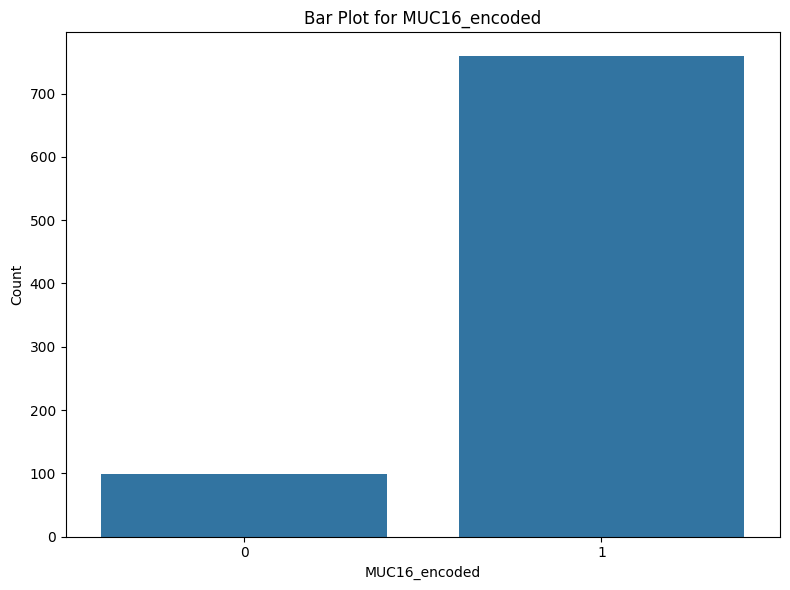

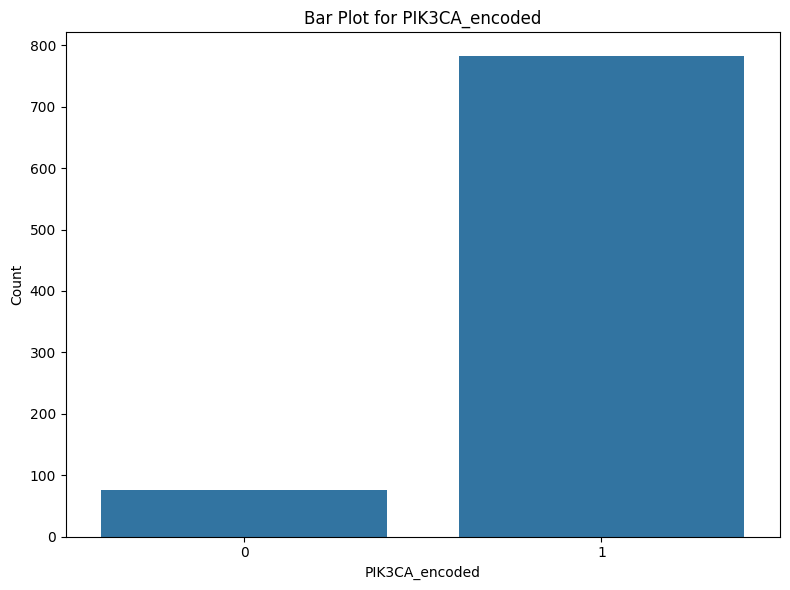

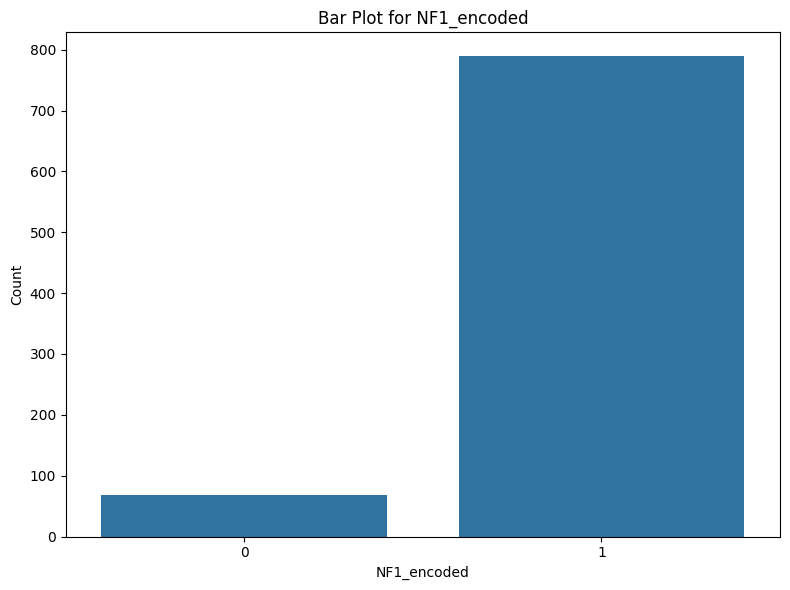

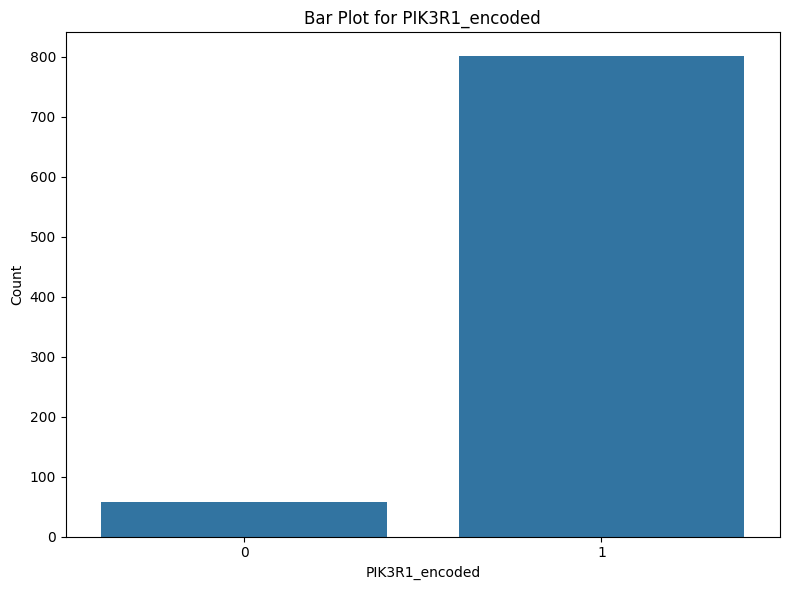

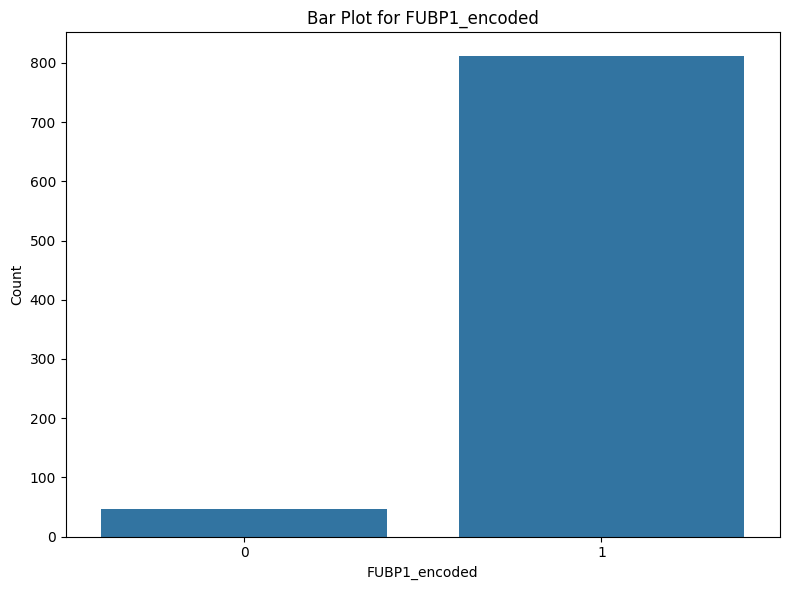

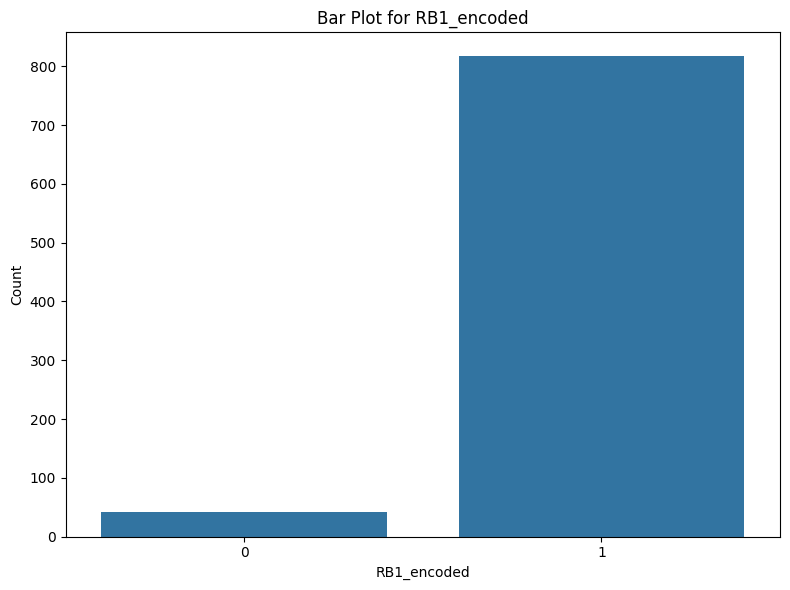

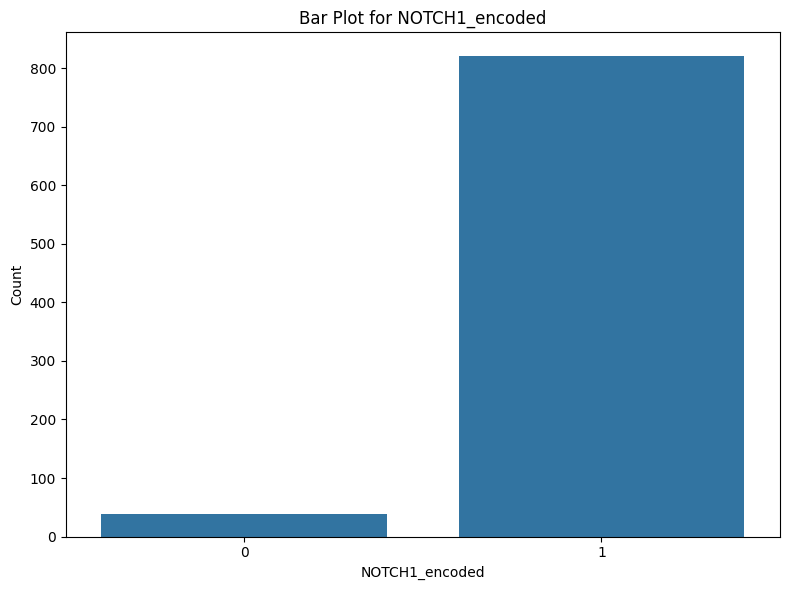

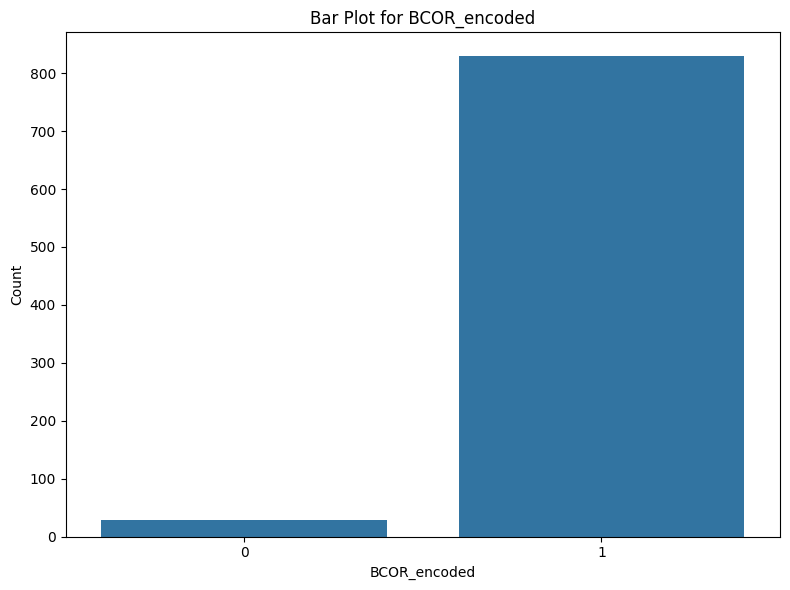

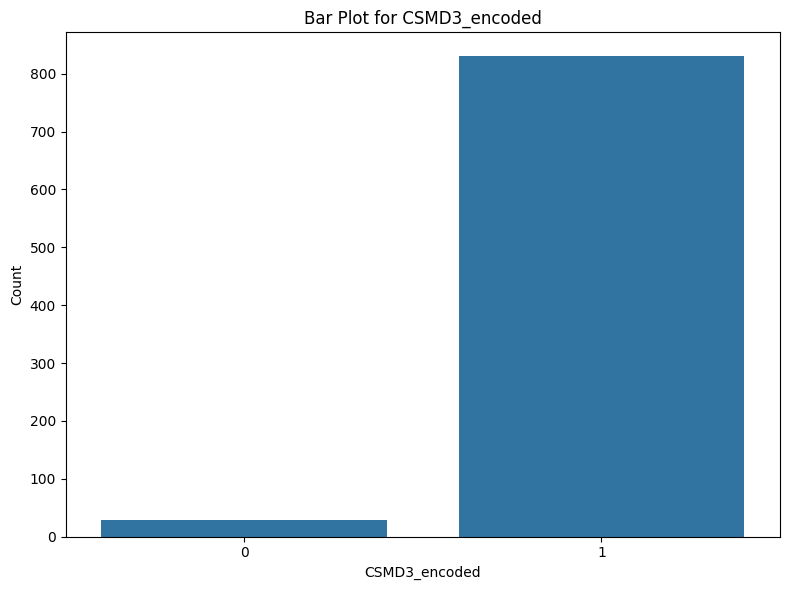

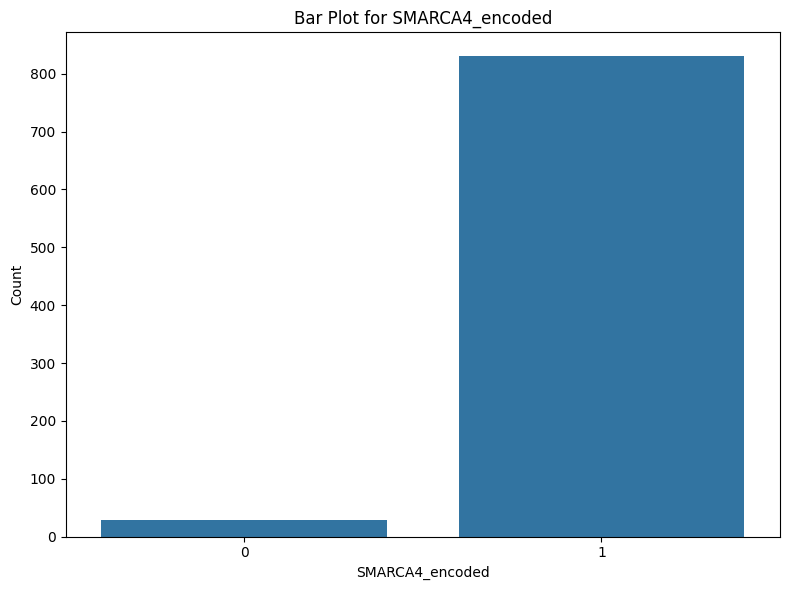

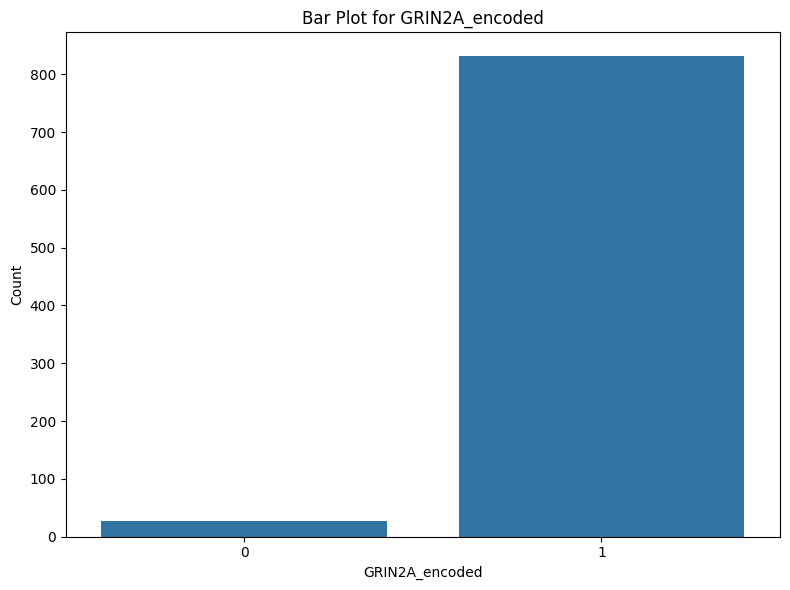

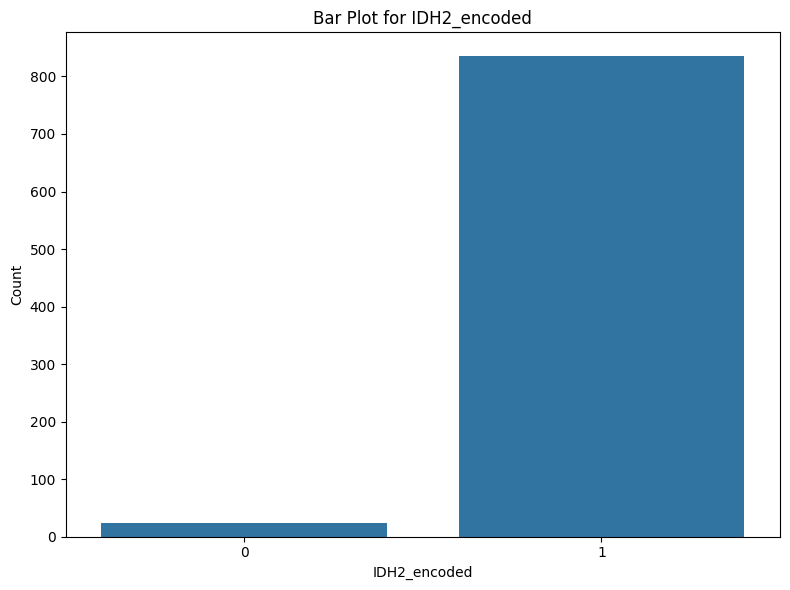

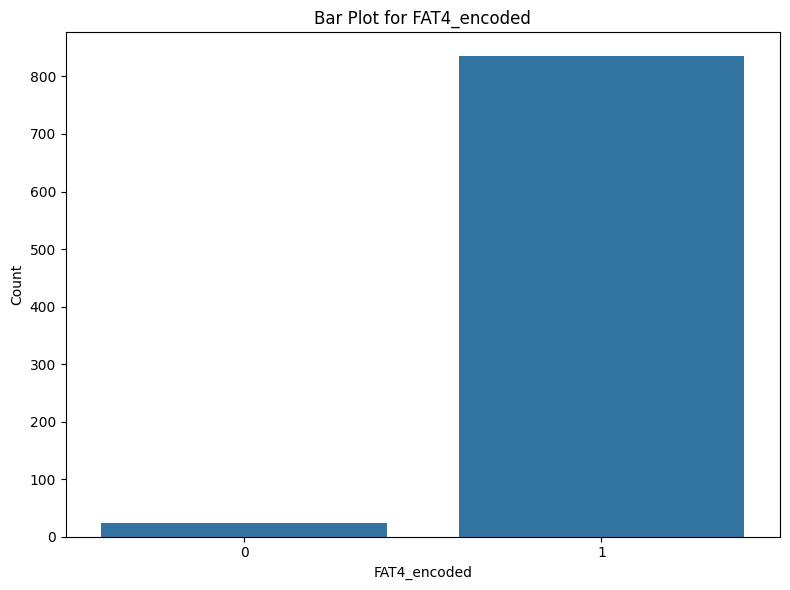

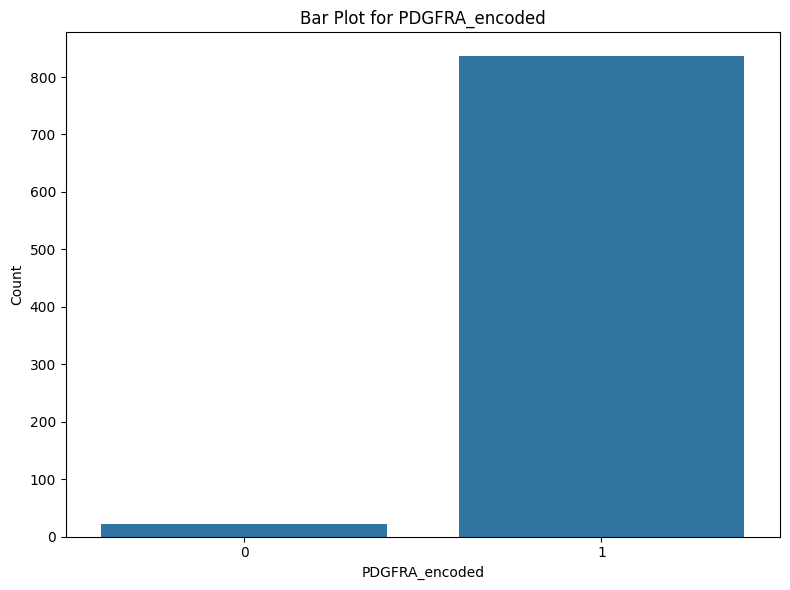

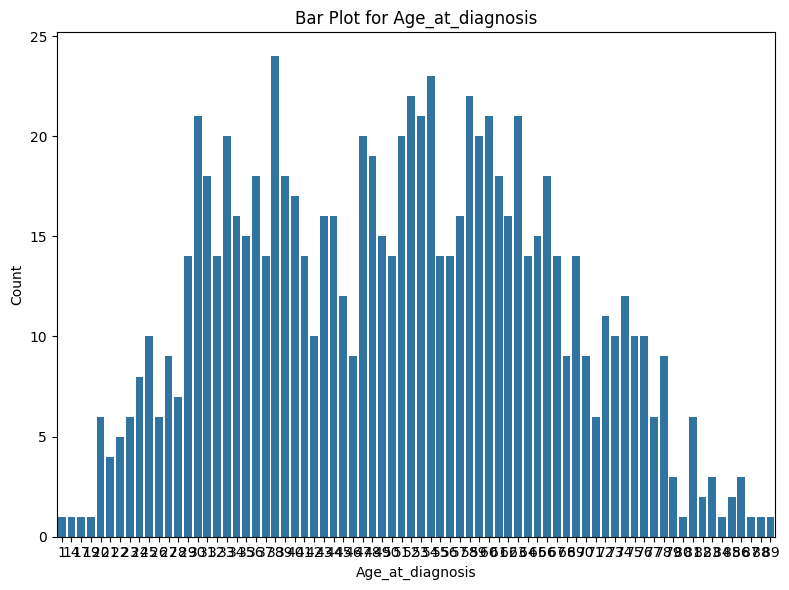

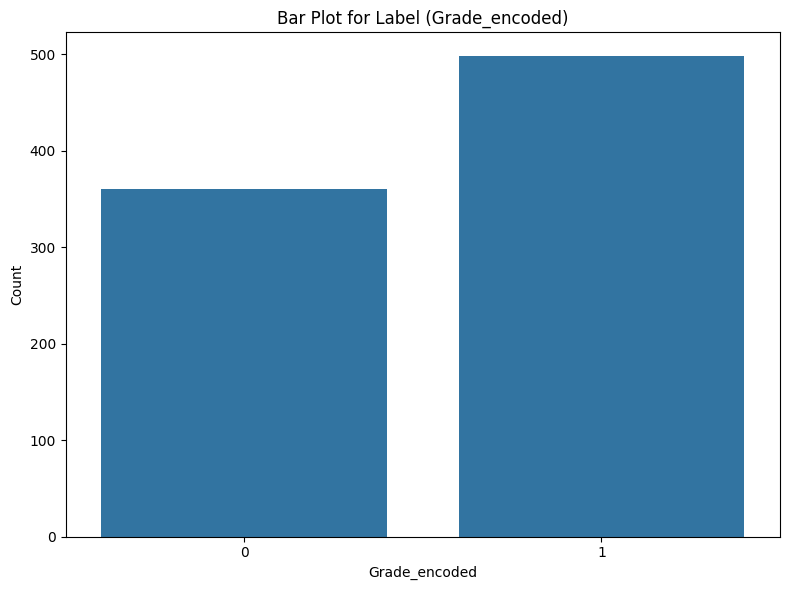

In [21]:
# Plot bar plots for features
for col in features.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=features)
    plt.title(f'Bar Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Plot bar plot for the label
plt.figure(figsize=(8, 6))
sns.countplot(x=label)
plt.title('Bar Plot for Label (Grade_encoded)')
plt.xlabel('Grade_encoded')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Correlation Matrix:
                           Grade_encoded  Project_encoded  Case_ID_encoded  \
Grade_encoded                   1.000000         1.000000         0.840752   
Project_encoded                 1.000000         1.000000         0.840752   
Case_ID_encoded                 0.840752         0.840752         1.000000   
Gender_encoded                 -0.060465        -0.060465        -0.036300   
Primary_Diagnosis_encoded       0.244986         0.244986         0.182279   
Race_encoded                    0.093812         0.093812         0.063380   
IDH1_encoded                   -0.710374        -0.710374        -0.604884   
TP53_encoded                   -0.154118        -0.154118        -0.103256   
ATRX_encoded                   -0.308156        -0.308156        -0.238791   
PTEN_encoded                    0.367560         0.367560         0.288991   
EGFR_encoded                    0.241558         0.241558         0.210076   
CIC_encoded                    -0.304983   

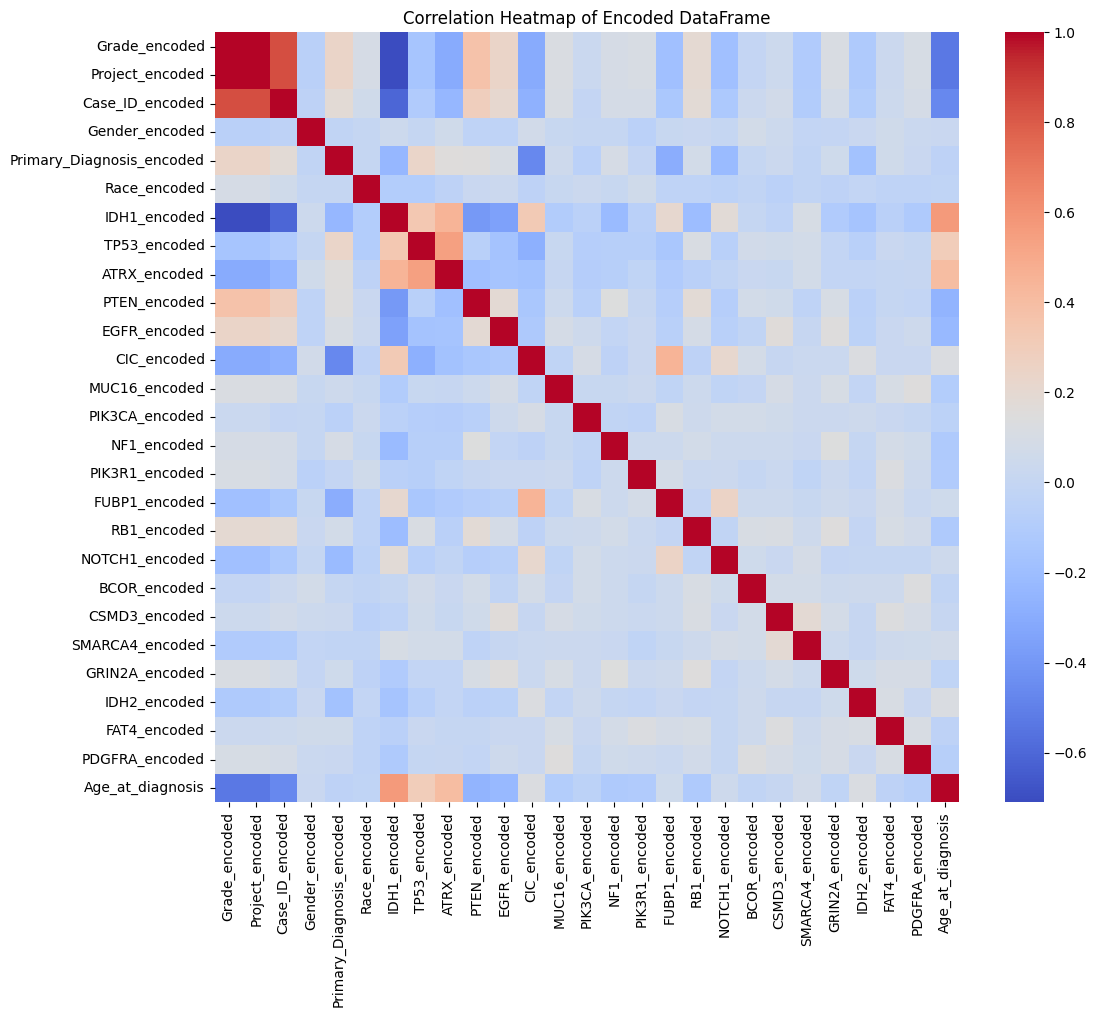

In [101]:
# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Print the numerical values in the correlation matrix greater than 0.80
print("\nCorrelation Values Greater Than 0.80 (excluding diagonal elements):")
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        if i != j:  # Exclude diagonal elements
            correlation_value = correlation_matrix.iloc[i, j]
            if correlation_value > 0.80:
                print(f"Correlation between {correlation_matrix.index[i]} and {correlation_matrix.columns[j]}: {correlation_value}")

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap of Encoded DataFrame')
plt.show()

In [22]:
print(encoded_df.columns)


Index(['Grade_encoded', 'Project_encoded', 'Case_ID_encoded', 'Gender_encoded',
       'Primary_Diagnosis_encoded', 'Race_encoded', 'IDH1_encoded',
       'TP53_encoded', 'ATRX_encoded', 'PTEN_encoded', 'EGFR_encoded',
       'CIC_encoded', 'MUC16_encoded', 'PIK3CA_encoded', 'NF1_encoded',
       'PIK3R1_encoded', 'FUBP1_encoded', 'RB1_encoded', 'NOTCH1_encoded',
       'BCOR_encoded', 'CSMD3_encoded', 'SMARCA4_encoded', 'GRIN2A_encoded',
       'IDH2_encoded', 'FAT4_encoded', 'PDGFRA_encoded', 'Age_at_diagnosis'],
      dtype='object')


In [23]:
# Drop 'Case_ID_encoded' and 'Project_encoded' from encoded_df
encoded_df.drop(columns=['Case_ID_encoded', 'Project_encoded', 'Primary_Diagnosis_encoded'], inplace=True)


In [24]:
print(encoded_df.columns)

Index(['Grade_encoded', 'Gender_encoded', 'Race_encoded', 'IDH1_encoded',
       'TP53_encoded', 'ATRX_encoded', 'PTEN_encoded', 'EGFR_encoded',
       'CIC_encoded', 'MUC16_encoded', 'PIK3CA_encoded', 'NF1_encoded',
       'PIK3R1_encoded', 'FUBP1_encoded', 'RB1_encoded', 'NOTCH1_encoded',
       'BCOR_encoded', 'CSMD3_encoded', 'SMARCA4_encoded', 'GRIN2A_encoded',
       'IDH2_encoded', 'FAT4_encoded', 'PDGFRA_encoded', 'Age_at_diagnosis'],
      dtype='object')


In [25]:
# Select features (all columns except 'Grade_encoded')
features = encoded_df.drop(columns=['Grade_encoded'])

# Select label ('Grade_encoded')
label = encoded_df['Grade_encoded']


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)


In [27]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.86

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       109
           1       0.95      0.81      0.87       149

    accuracy                           0.86       258
   macro avg       0.87      0.88      0.86       258
weighted avg       0.88      0.86      0.87       258



In [29]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.83

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       109
           1       0.86      0.85      0.85       149

    accuracy                           0.83       258
   macro avg       0.82      0.83      0.83       258
weighted avg       0.83      0.83      0.83       258



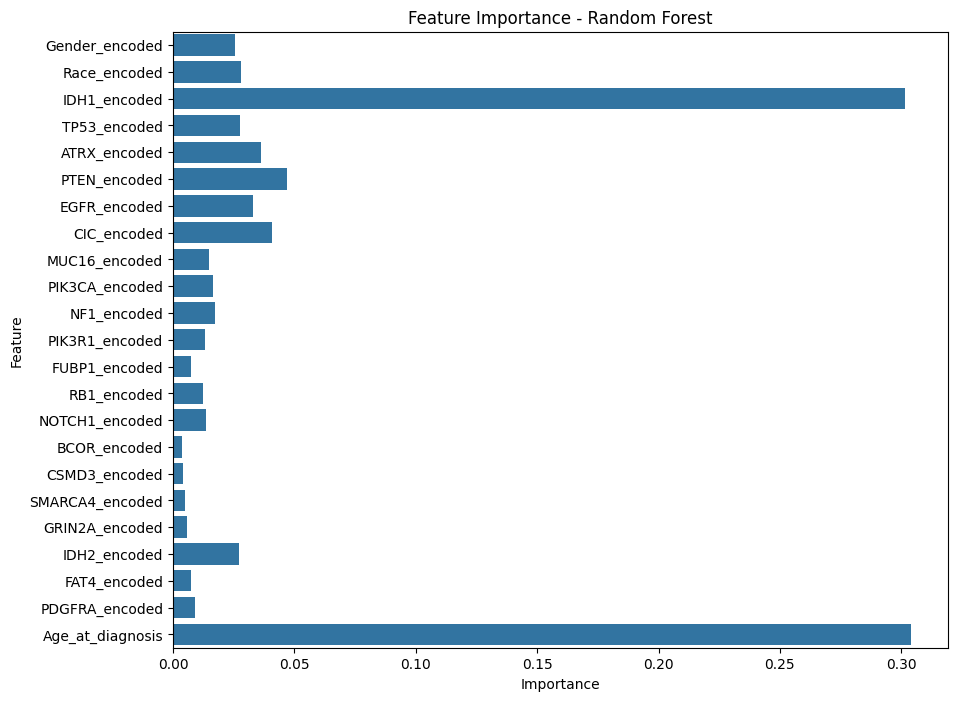

In [30]:
# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=rf_model.feature_importances_, y=features.columns)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

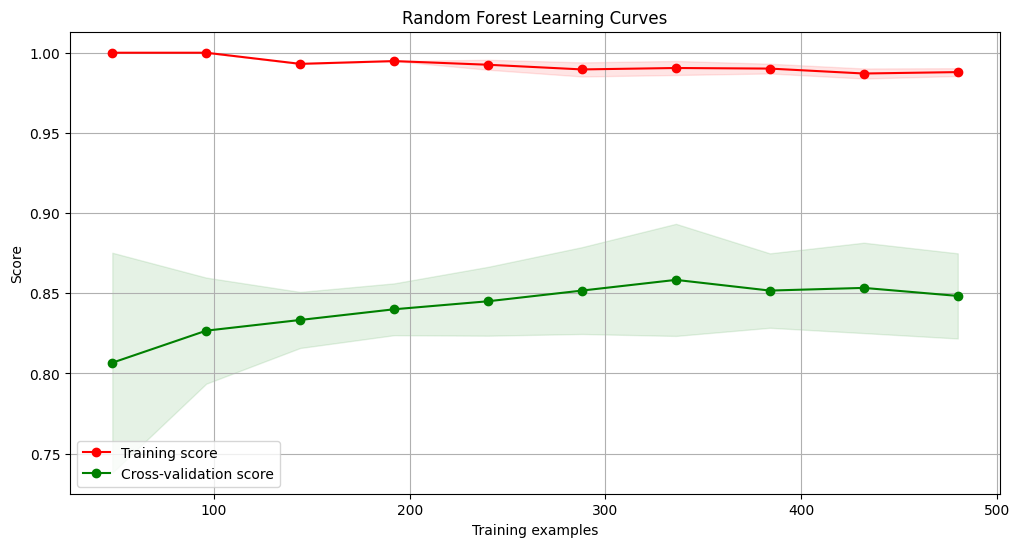

In [31]:
def plot_learning_curves(estimator, X, y, title='Learning Curves'):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Plot learning curves for the Random Forest model
plot_learning_curves(rf_model, X_train, y_train, title='Random Forest Learning Curves')
plt.show()

In [34]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Retrieve the best model
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nOptimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy found:  0.8800000000000001
Optimized Random Forest Accuracy: 0.86

Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       109
           1       0.93      0.83      0.88       149

    accuracy                           0.86       258
   macro avg       0.86      0.87      0.86       258
weighted avg       0.87      0.86      0.87       258



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


XGBOOST Accuracy: 0.85

XGBOOST Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.88      0.86      0.87       149

    accuracy                           0.85       258
   macro avg       0.85      0.85      0.85       258
weighted avg       0.85      0.85      0.85       258

Cross-validation scores: [0.825      0.80833333 0.84166667 0.875      0.86666667]
Mean cross-validation score: 0.84


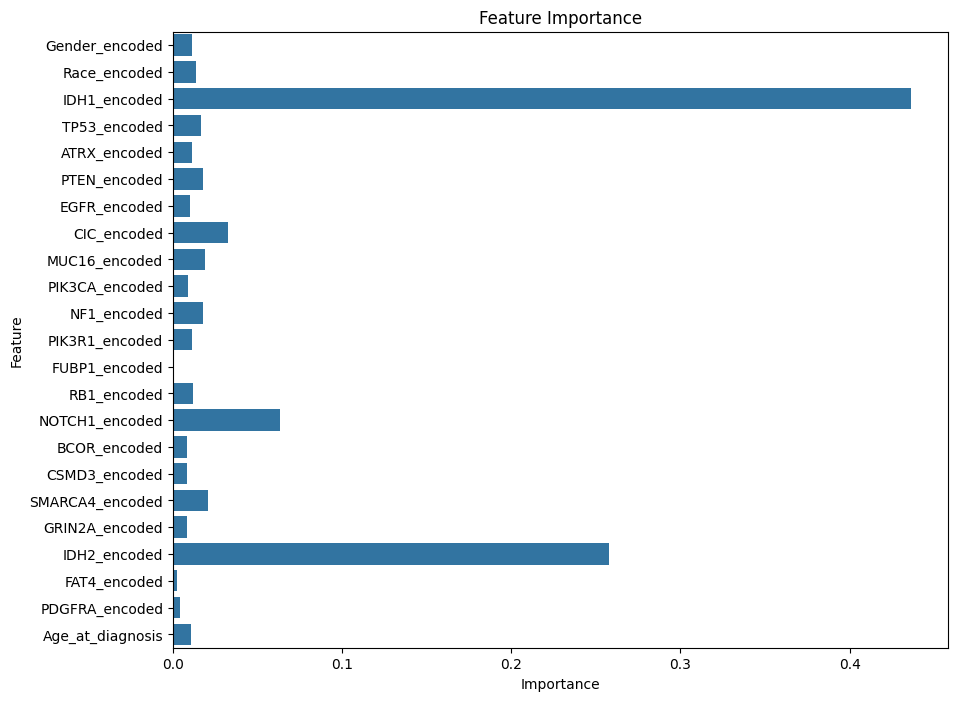

In [32]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBOOST Accuracy: {accuracy:.2f}")

print("\nXGBOOST Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
cross_val_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean():.2f}")

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=xgb_model.feature_importances_, y=features.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Adjusted XGBOOST Accuracy: 0.86

Adjusted XGBOOST Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       109
           1       0.89      0.85      0.87       149

    accuracy                           0.86       258
   macro avg       0.85      0.86      0.85       258
weighted avg       0.86      0.86      0.86       258

Adjusted Cross-validation scores: [0.84166667 0.825      0.875      0.86666667 0.875     ]
Mean Adjusted cross-validation score: 0.86


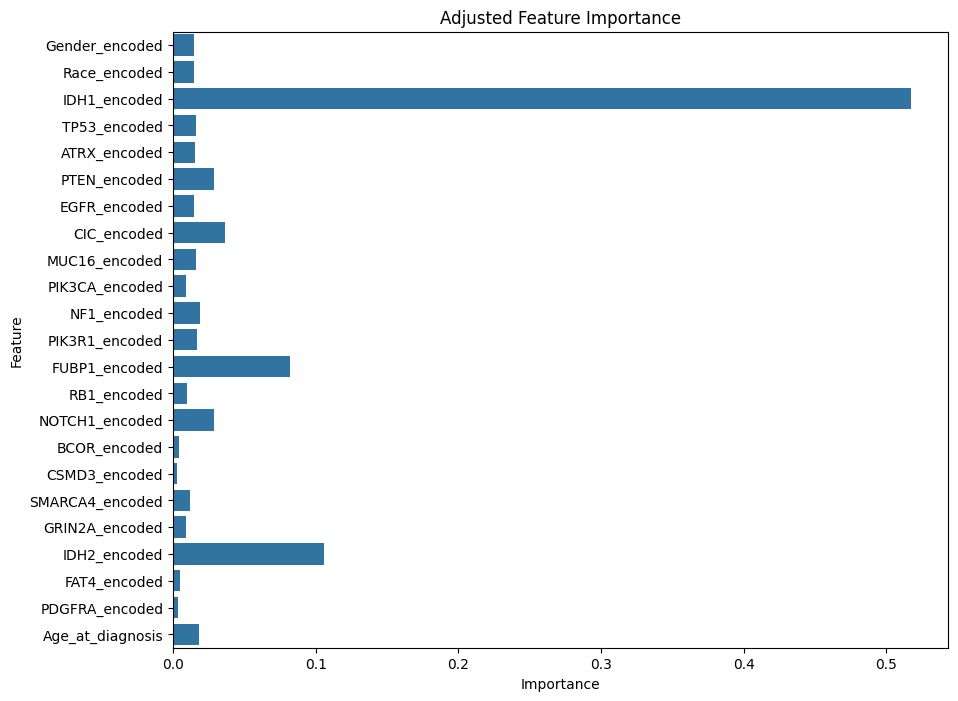

In [33]:
# Adjusting model parameters
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=6,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=1
)
xgb_model.fit(X_train, y_train)

# Evaluating the model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Adjusted XGBOOST Accuracy: {accuracy:.2f}")
print("\nAdjusted XGBOOST Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation to check stability
cross_val_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"Adjusted Cross-validation scores: {cross_val_scores}")
print(f"Mean Adjusted cross-validation score: {cross_val_scores.mean():.2f}")

# Feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=xgb_model.feature_importances_, y=features.columns)
plt.title('Adjusted Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()